# 🚗 **`USED CARS PRICE PREDICTION`** 

# `Business Problem Understanding`

>**Context**

Syarah is an online marketplace for buying and selling cars in Saudi Arabia ([entrepreneur](https://www.entrepreneur.com/en-ae/finance/saudi-arabia-based-online-cars-marketplace-syarah-raises/314901)). So, we can say that there are 3 parties in the business process (Sellers - Syarah - Buyers). Sellers advertise cars they want to sell through Syarah, and buyers buy used cars advertised through Syarah. 

Sellers advertise their cars by define the specifications and price. Sometimes, it will be difficult for the seller who don't know about price range in the market. Because it could be that the seller sets a price that is too low (underpriced) or too high (overpriced) than the price should be. If underpriced, then Sellers will get inappropriate profit. Meanwhile, if overpriced, it may lead to the cars is hard to sold.

>**Problem Statement**

Based on context, as a Business owner, Syarah, also will affected by those problem. If overpriced, buyers will decrease, so the company profit also decrease. As time goes by, sellers will don't want to advertise their cars thorugh Syarah due to low buyers/visitor. If underpriced, company will only get small profit (proportion of sales) due to small price. So we can conclude that the problems is: **How's Syarah can help sellers to determine the right price?**

>**Goals**

With the problem above, we can determine our goals (solution) as: **Provides car price prediction by minimizing errors so that it is not overpriced and underpriced**

>**Project Stakeholder**

Stakeholder who will use the solution is **Sellers in Syarah**

>**Analytics Approach**

We will use **Regression Model** as method to achieve the goal. 

Regression is a type of Machine learning which helps in finding the relationship between independent and dependent variable. In simple words, Regression can be defined as a Machine learning problem where we have to predict discrete values like price, Rating, Fees, etc ([Raghav Agrawal](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)).

>**Metrics Evaluation**

Evaluation metrics are quantitative measures used to assess the performance and effectiveness of a statistical or machine learning model. These metrics provide insights into how well the model is performing and help in comparing different models or algorithms ([Tavish Srivastava](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/#:~:text=Evaluation%20metrics%20are%20quantitative%20measures,comparing%20different%20models%20or%20algorithms.)).

Regression machine learning models have various metrics such as MAE, MAPE, and R-squared.
* **Mean Absolute Error(MAE)** is a very simple metric which calculates the absolute difference between actual and predicted values ([Raghav Agrawal](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/)).
* **Mean Absolute Percentage Error (MAPE)** measures the precision of the forecasts by showing the average percent difference between forecasts and actual activities regardless of whether the individual forecasts were too high or too low. A MAPE less than 5% is considered as an indication that the forecast is acceptably accurate. A MAPE greater than 10% but less than 25% indicates low, but acceptable accuracy and MAPE greater than 25% very low accuracy, so low that the forecast is not acceptable in terms of its accuracy ([Swanson, David A](https://escholarship.org/content/qt1f71t3x9/qt1f71t3x9.pdf?t=o5wul1#:~:text=A%20MAPE%20less%20than%205,in%20terms%20of%20its%20accuracy.)).
* **R squared (R²)** is a popular metric for identifying model accuracy. It tells how close are the data points to the fitted line generated by a regression algorithm. A larger R squared value indicates a better fit. This helps us to find the relationship between the independent variable towards the dependent variable. R² score ranges from 0 to 1. The closest to 1 the R², the better the regression model is. If R² is equal to 0, the model is not performing better than a random model ([Shweta Goyal](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af#:~:text=R%20squared%20is%20a%20popular,variable%20towards%20the%20dependent%20variable.)).

# `Data Understanding`

The dataset contains 5624 records of used cars collected from syarah.com. Each row represents a used car. Other information regarding each car is the brand name, model, manufacturing year, origin, options, engine capacity, transmission type, mileage that the car covered, region price, and negotiable.

Features
-	**Type**: Type of used car.
-	**Region**: The region in which the used car was offered for sale.
-	**Make**: The company name.
-	**Gear_Type**: Gear type size of used car.
-	**Origin**: Origin of used car.
-	**Options**: Options of used car.
-	**Year**: Manufacturing year.
-	**Engine_Size**: The engine size of used car.
-	**Mileage**: Mileage of used car	
-	**Negotiable**: True if the price is 0, that means it is negotiable.
-	**Price**: Used car price.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import function as fn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth', 2000)

In [2]:
# load data
df = pd.read_csv(r'D:\PURWADHIKA\PLAYGROUND\PYTHON\Modul 3\Capstone\Saudi Arabia Used Cars\data\raw\data_saudi_used_cars.csv')
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [3]:
# check shape
df.shape

(5624, 11)

## Initial Assesment

In [4]:
# check initial info of data
pd.DataFrame({
    'column': df.columns.values,
    'type': df.dtypes.values,
    'n_unique': df.nunique().values,
    'min': df.min().values,
    'max': df.max().values,
    'sample_unique': [df[col].sort_values().unique() for col in df.columns]
})

,column,type,n_unique,min,max,sample_unique
0,Type,object,347,2,ِACTIS V80,"[2, 3, 300, 3008, 301, 360, 4Runner, 5, 500, 5008, 6, 911, A, A3, A4, A5, A6, A7, A8, APV, ASX, ATS, Abeka, Acadia, Accent, Accord, Altima, Armada, Attrage, Aurion, Avalanche, Avalon, Avante, Avanza, Aveo, Azera, Azkarra, B50, BT-50, Beetle, Bentayga, Blazer, Bora, Boxer, Bronco, Bus County, Bus Urvan, C, C200, C300, C5700, CC, CL, CLA, CLS, CRV, CS35, CS35 Plus, CS75, CS85, CS95, CT-S, CT4, CT5, CT6, CX3, CX5, CX7, CX9, Cadenza, Cadillac, Camargue, Camaro, Camry, Caprice, Capture, Carens, Carenz, Carnival, Cayenne, Cayenne S, Cayenne Turbo, Cayenne Turbo S, Cayman, Centennial, Cerato, Challenger, Charger, Cherokee, Ciocca, City, Civic, Coaster, Colorado, Compass, Coolray, Copper, Cores, Corolla, Corolla Cross, ...]"
1,Region,object,27,Abha,Yanbu,"[Abha, Al-Ahsa, Al-Baha, Al-Jouf, Al-Medina, Al-Namas, Arar, Aseer, Besha, Dammam, Hafar Al-Batin, Hail, Jazan, Jeddah, Jubail, Khobar, Makkah, Najran, Qassim, Qurayyat, Riyadh, Sabya, Sakaka, Tabouk, Taef, Wadi Dawasir, Yanbu]"
2,Make,object,58,Aston Martin,Škoda,"[Aston Martin, Audi, BMW, BYD, Bentley, Cadillac, Changan, Chery, Chevrolet, Chrysler, Classic, Daihatsu, Dodge, FAW, Ferrari, Fiat, Ford, Foton, GAC, GMC, Geely, Genesis, Great Wall, HAVAL, Honda, Hummer, Hyundai, INFINITI, Isuzu, Iveco, Jaguar, Jeep, Kia, Land Rover, Lexus, Lifan, Lincoln, MG, MINI, Maserati, Mazda, Mercedes, Mercury, Mitsubishi, Nissan, Other, Peugeot, Porsche, Renault, Rolls-Royce, SsangYong, Suzuki, Tata, Toyota, Victory Auto, Volkswagen, Zhengzhou, Škoda]"
3,Gear_Type,object,2,Automatic,Manual,"[Automatic, Manual]"
4,Origin,object,4,Gulf Arabic,Unknown,"[Gulf Arabic, Other, Saudi, Unknown]"
5,Options,object,3,Full,Standard,"[Full, Semi Full, Standard]"
6,Year,int64,50,1963,2022,"[1963, 1964, 1965, 1975, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]"
7,Engine_Size,float64,71,1.0,9.0,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.2, 7.4, 7.5, 7.8, 8.0, 8.5, 8.7, 8.8, 8.9, 9.0]"
8,Mileage,int64,1716,100,20000000,"[100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 124, 126, 128, 130, 131, 132, 133, 135, 138, 140, 142, 143, 145, 147, 148, 149, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 204, 205, 206, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 219, 220, 222, 223, 224, 225, ...]"
9,Negotiable,bool,2,False,True,"[False, True]"


**Insight :** 
* This dataset contains 5624 rows and 11 columns
* Variable Numerical: Year, Engine_Size, Mileage, Price
* Variable Categorical: Type, Region, Make, Gear_Type, Origin, Options, Negotiable
* The model year of cars sold are from 1963 to 2022
* Highest price is 850000 Riyals
* Ambigous Values:
    * `Mileage` : contain extreme value 20000000, which is unlikely
    * `Price` : contains values 0 and 1, which is unlikely 

# `Data Preparation`

## Finding Problematic Data

### **Duplicate Data**

In [5]:
# check duplicated data
dup = df.duplicated().sum()
dup, dup/df.shape[0]*100

(4, 0.07112375533428165)

* **Insight** : This dataset contains 4 (0.07%) duplicate data
* **Handling** : delete the data

In [6]:
# delete duplicate data
df.drop_duplicates(inplace=True)

### **Missing Values**

In [7]:
# check missing values
df.isnull().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

* **Insight** : This dataset doesn't have missing values

### **Ambigous Values**

From initial assessment we know that there are ambigous values in `Mileage` and `Price`. In this part, we only check and handling `Price` column. `Mileage` column will handle later in outliers.

In [8]:
# check price 0
sum(df.Price == 0), sum(df.Price == 0)/df.shape[0]

(1796, 0.3195729537366548)

<Axes: >

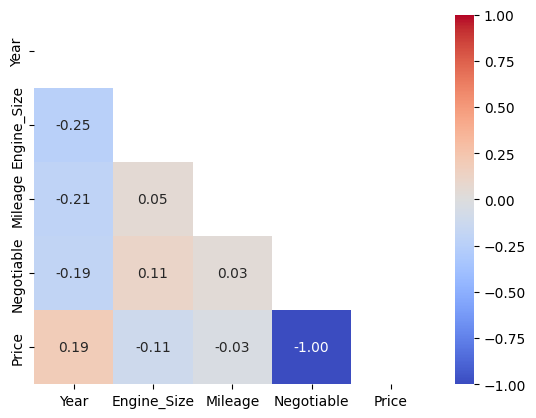

In [9]:
# check correlation with another columns
dfAmb = df.copy()

# change non 0 val price to 1
dfAmb['Price'][dfAmb.Price != 0] = 1

# numerical
numCol = dfAmb.select_dtypes(exclude=object).columns
numCor = dfAmb[numCol].corr()

# correlation with numerical variables
sns.heatmap(numCor, annot=True, mask=np.triu(numCor), vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f")

In [10]:
# correlation with categorical variables
catCol = dfAmb.select_dtypes(include=object).columns

for col in catCol:
    print(f'Contingency Table for {col} and Price')
    display(pd.crosstab(dfAmb[col], dfAmb.Price).sort_values(by=0, ascending=False))

Contingency Table for Type and Price


Price,0,1
Type,,
Land Cruiser,121,148
Hilux,89,118
Camry,84,149
Yukon,69,93
Tahoe,50,100
...,...,...
Platinum,0,2
Power,0,1
Cores,0,2


Contingency Table for Region and Price


Price,0,1
Region,,
Riyadh,655,1615
Jeddah,186,546
Dammam,176,748
Qassim,113,112
Al-Medina,90,124
Aseer,76,87
Makkah,66,87
Al-Ahsa,55,111
Taef,50,53


Contingency Table for Make and Price


Price,0,1
Make,,
Toyota,541,889
Ford,184,346
Chevrolet,162,296
Hyundai,156,512
Nissan,135,252
GMC,115,167
Lexus,76,146
Kia,64,186
Mercedes,53,173


Contingency Table for Gear_Type and Price


Price,0,1
Gear_Type,,
Automatic,1451,3420
Manual,345,404


Contingency Table for Origin and Price


Price,0,1
Origin,,
Saudi,1291,2893
Other,258,420
Gulf Arabic,202,495
Unknown,45,16


Contingency Table for Options and Price


Price,0,1
Options,,
Full,759,1473
Semi Full,542,1027
Standard,495,1324


* **Insight** :
    * Number of 0 values are 1796 rows (31.95%)
    * `Price` have strong negative correlation with `Negotiable`. It means that 0 price appear when the car is negotiable.
* **Handling** :
    * Remove the data, and use it as unseen data
    * Remove the `Negotiable` column, because it will only contains 1 values, which is not useful for modeling

In [11]:
# delete negotiable column
df.drop(columns='Negotiable', inplace=True)
df.shape

(5620, 10)

In [12]:
# divide price 0 and save as unseen data
df[df.Price == 0].to_csv(r'D:\PURWADHIKA\PLAYGROUND\PYTHON\Modul 3\Capstone\Saudi Arabia Used Cars\data\processed\unseen_data.csv', index=False)

In [13]:
# remove 0 price values
df = df[df.Price != 0]
df.shape

(3824, 10)

In [14]:
# check price 1
# df[df.Price == 1].shape[0]
(df.Price == 1).sum(), (df.Price == 1).sum()/df.shape[0]*100

(1, 0.02615062761506276)

* **Insight** :
    * Number of 1 values are 1 rows (0.02%)
* **Handling** :
    * Remove the data

In [15]:
# remove price 1
df = df[df.Price != 1]
df.shape

(3823, 10)

### **Outliers**

#### Mileage

In [ ]:
# function to analyze outliers
def ansOut(data, col):
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(15,5))

    # add graph
    sns.boxplot(data=data, x=col, ax=ax_box)
    sns.histplot(data[col], kde=True, ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

    # summary
    result = fn.checkOutlier(data, col)
    print('Numbers of outliers: {} ({:.2f}%)'.format(result[0],result[1]))
    display(data[col].describe().apply("{0:.0f}".format))

Numbers of outliers: 131 (3.43%)


count        3823
mean       142645
std        378441
min           100
25%         48000
50%        103000
75%        183000
max      20000000
Name: Mileage, dtype: object

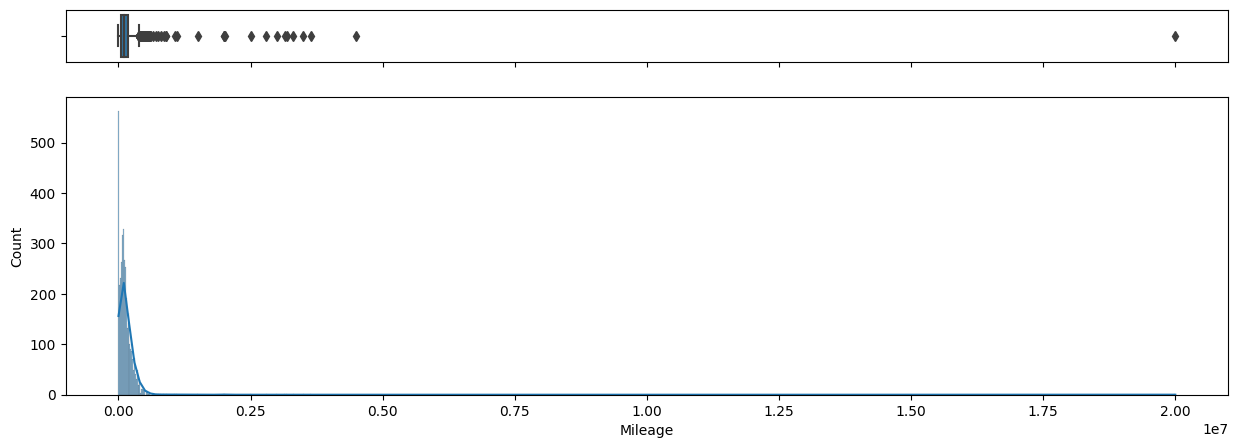

In [16]:
# analyze Mileage outliers 
ansOut(df, 'Mileage')

* **Insight** :
    * There are 131 (3.43% outliers of the data)
* **Handling** :
    * Domain knowledge: The annual miles per year is assumed to be 16,000, the average reported mileage for used cars taken from ksa.motory.com ([Tamara L. Sheldon](https://www.sciencedirect.com/science/article/pii/S0140988320303662#:~:text=The%20annual%20miles%20per%20year,from%20ksa.motory.com.))
    * From the dataset we know that Year range is from 1963 onwards. 
    * It's highly unlikely for cars have have mileage more than than 60 years (current year 2023 from 1963). 
    * So, **cars with mileage more than 960000 (60*16000) will be removed**.

In [18]:
# set average total mileage
atm = 960000

# remove cars above atm
df = df[df['Mileage'] < atm]
df.shape

(3807, 10)

Numbers of outliers: 120 (3.15%)


count      3807
mean     127683
std      110759
min         100
25%       48000
50%      102113
75%      181000
max      900000
Name: Mileage, dtype: object

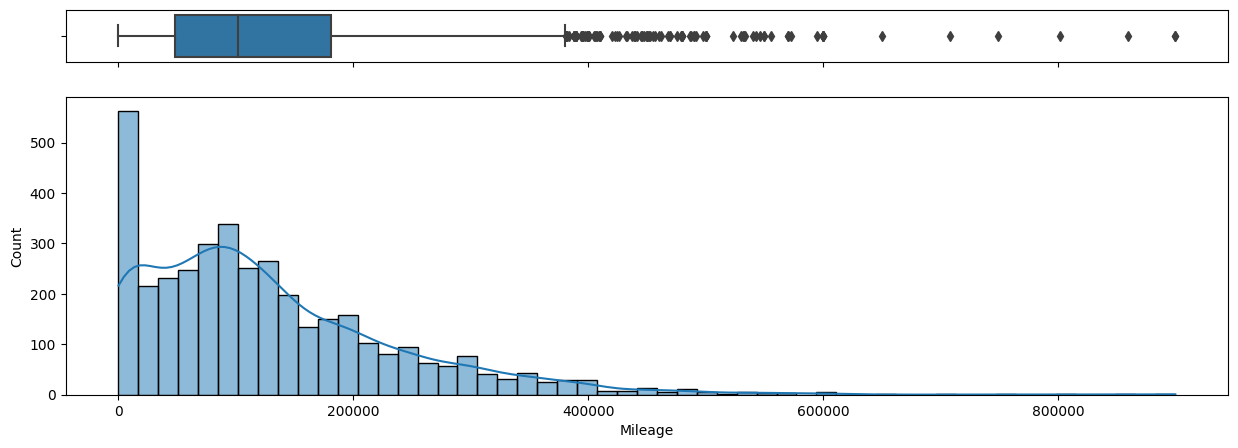

In [23]:
# check Distribution of MIleage again
ansOut(df, 'Mileage')